In [27]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim


In [28]:
X_train = np.arange(0,100,1)
y_train = np.sin(X_train)

X_test = np.arange(100,200,1)
y_test = np.sin(X_test)

n_features = 1

train_series = y_train
test_series  = y_test

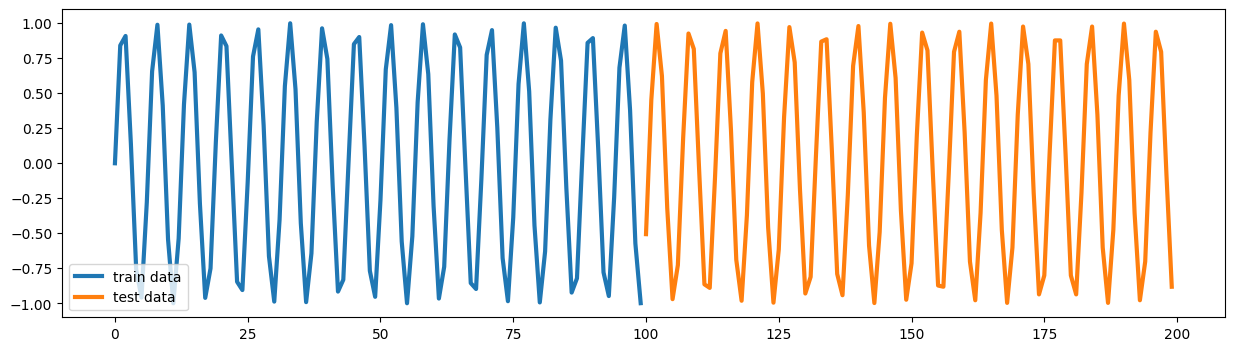

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show()

In [30]:
train_series = torch.from_numpy(train_series)
test_series = torch.from_numpy(test_series)

In [31]:
look_back = 20

train_dataset = []
train_labels = []
for i in range(len(train_series)-look_back):
    train_dataset.append(train_series[i:i+look_back])
    train_labels.append(train_series[i+look_back])
train_dataset = torch.stack(train_dataset).unsqueeze(2)
train_labels = torch.stack(train_labels).unsqueeze(1)

In [32]:
print(train_dataset.shape)
print(train_labels.shape)

torch.Size([80, 20, 1])
torch.Size([80, 1])


In [33]:
class Net(nn.Module):
    def __init__(self, n_neurons=4, input_shape=1):
        super(Net, self).__init__()
        
        self.rnn = nn.RNN(input_size=input_shape, hidden_size=n_neurons, batch_first=True)
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons, batch_first=True)
        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:,-1,:])
        return out

In [34]:
model = Net().double()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_curve = []
for epoch in range(1000):
    loss_total = 0
    
    model.zero_grad()
    
    predictions = model(train_dataset)
    
    loss = loss_function(predictions, train_labels)
    loss_total += loss.item()
    loss.backward()
    optimizer.step()
    loss_curve.append(loss_total)

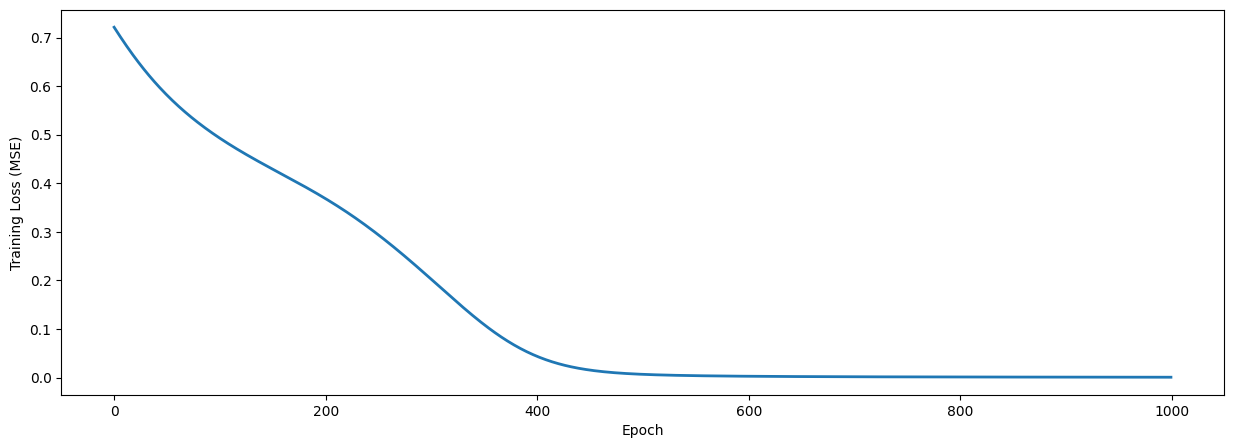

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(loss_curve, lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

In [66]:
test_dataset = [test_series[i:i+20] for i in range(len(train_series)-look_back)]
test_dataset = torch.stack(test_dataset).unsqueeze(2)

test_predictions = []
for i in range(80):
    with torch.no_grad():
        res = model(test_dataset[:1,:,:])
        
        test_predictions.append(res)
        
        test_dataset = torch.concat((test_dataset[:1,:,:], res.unsqueeze(0)), dim=1)
        test_dataset = test_dataset[:1,1:,:]

res = torch.stack(test_predictions)
res = res.squeeze(1)

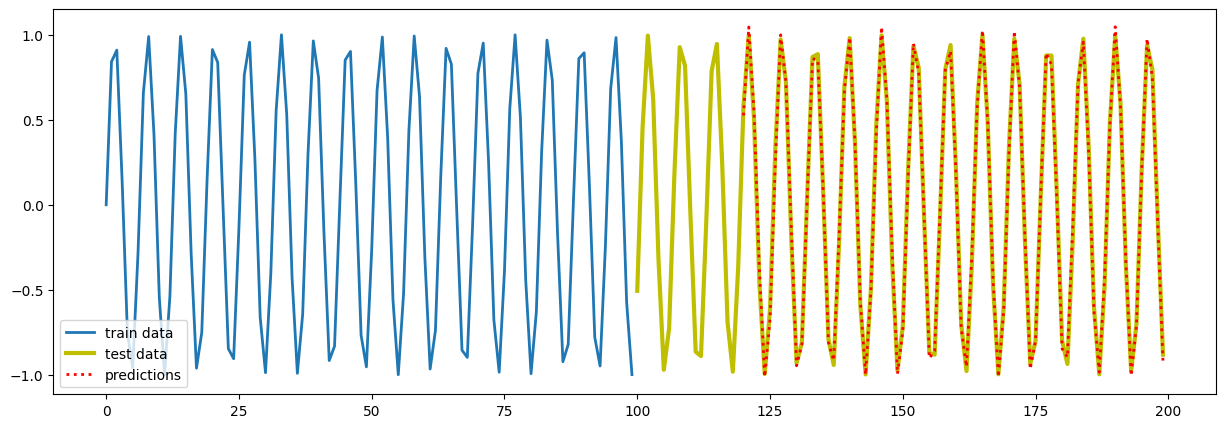

In [68]:
x = np.arange(120,200,1)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,res, lw=2, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()

In [73]:
X_train = np.arange(0,50,0.5) 
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5) 
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

train_series = y_train
test_series  = y_test

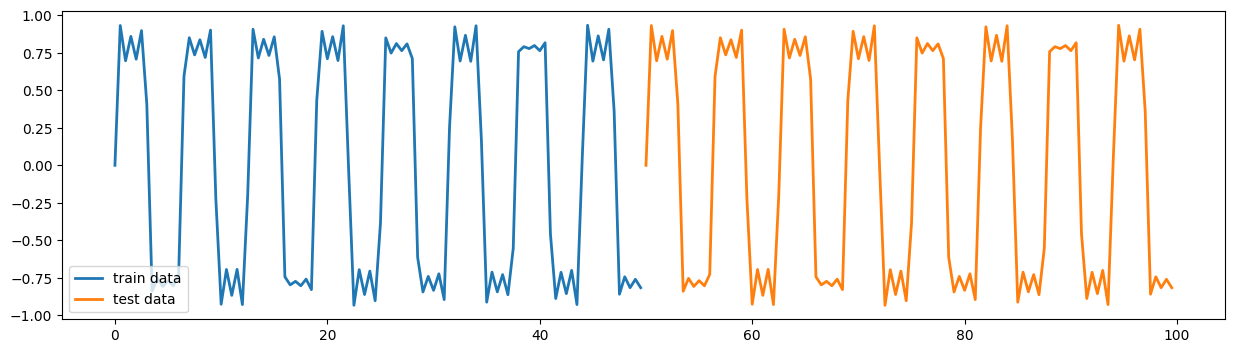

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show()

In [75]:
train_series = torch.from_numpy(train_series)
test_series = torch.from_numpy(test_series)

In [76]:
look_back = 20

train_dataset = []
train_labels = []
for i in range(len(train_series)-look_back):
    train_dataset.append(train_series[i:i+look_back])
    train_labels.append(train_series[i+look_back])
train_dataset = torch.stack(train_dataset).unsqueeze(2)
train_labels = torch.stack(train_labels).unsqueeze(1)

In [77]:
model = Net().double() # Need to recreate model and optimizer to reset hidden values
optimizer = optim.Adam(model.parameters(), lr=0.003) # Higher learning rate used for more complicated task to get similar performance in similar epochs
loss_curve = []
for epoch in range(1000):
    loss_total = 0
    
    model.zero_grad()
    
    predictions = model(train_dataset)
    
    loss = loss_function(predictions, train_labels)
    loss_total += loss.item()
    loss.backward()
    optimizer.step()
    loss_curve.append(loss_total)

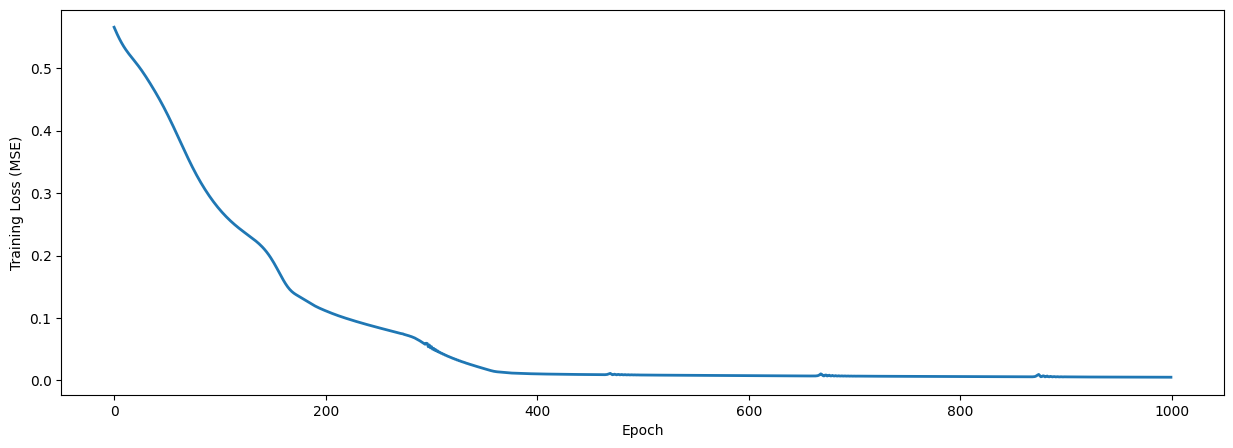

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(loss_curve, lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

In [80]:
test_dataset = [test_series[i:i+20] for i in range(len(train_series)-look_back)]
test_dataset = torch.stack(test_dataset).unsqueeze(2)

with torch.no_grad():
    test_predictions = model(test_dataset)

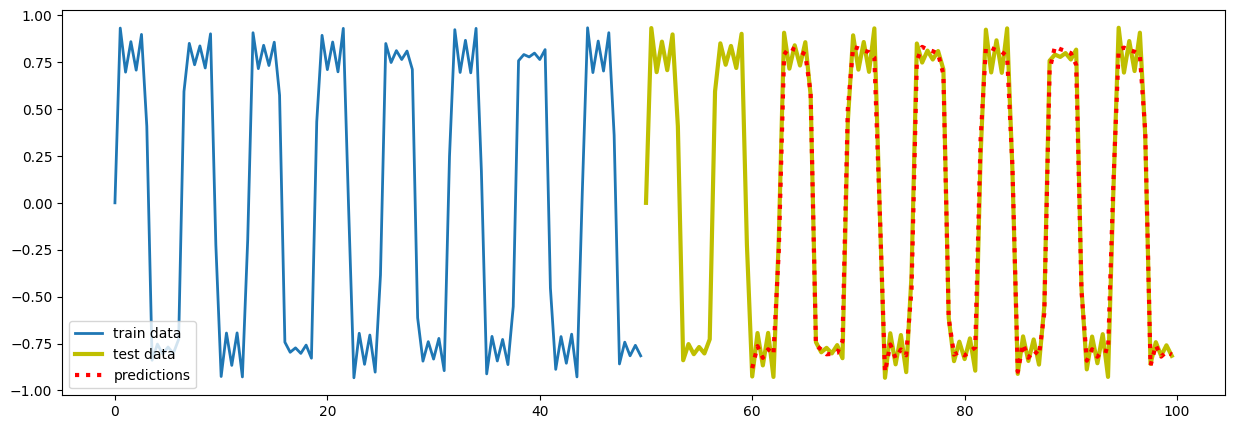

In [81]:
x = np.arange(60,100,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();